# Supply and Demand

#### John Stachurski

Here is some code that needs improving.  It involves a basic supply and demand problem.  First let's do some standard imports and set up commands

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect

### A Market 

Let's consider a market where supply is given by

$$ q_s(p) = \exp(\alpha p) - \beta. $$

The demand curve is

$$ q_d(p) = \gamma p^{-\delta}.  $$

The values $\alpha$, $\beta$, $\gamma$ and $\delta$ are **parameters**

The equilibrium $p^*$ is the price such that $q_d(p) = q_s(p)$.

We can solve for this equilibrium using a root finding algorithm.  Specifically, we will find the $p$ such that $h(p) = 0$, where

$$ h(p) := q_d(p) - q_s(p) $$

This yields the equilibrium price $p^*$.  From this we get the equilibrium price by $q^* = q_s(p^*)$

Then we'll plot our results.  The parameter values will be

* $\alpha = 0.1$
* $\beta = 1$
* $\gamma = 1$
* $\delta = 1$

In [10]:
class Equilibrium:
    
    def __init__(self, α=0.12, β=1, γ=1, δ=1):
        self.α, self.β, self.γ, self.δ = α, β, γ, δ

    def qs(self, p):
        return np.exp(self.α * p) - self.β
    
    def qd(self, p):
        return self.γ * p**(-self.δ)
        
    def compute_equilibrium(self):
        def h(p):
            return self.qd(p) - self.qs(p)
        p_star = bisect(h, 2, 4)
        q_star = np.exp(α * p_star) - β

        print(f'Equilibrium price is {p_star: .2f}')
        print(f'Equilibrium quantity is {q_star: .2f}')

    def plot_equilibrium(self):
        # Now plot
        grid = np.linspace(2, 4, 100)
        fig, ax = plt.subplots(figsize=(8, 6))

        ax.plot(grid, self.qd(grid), 'b-', lw=2, label='demand')
        ax.plot(grid, self.qs(grid), 'g-', lw=2, label='supply')

        ax.set_xlabel('price', fontsize=14)
        ax.set_ylabel('quantity', fontsize=14)
        ax.legend(loc='upper center')

        plt.show()

In [11]:
eq = Equilibrium()

In [12]:
eq.compute_equilibrium()

Equilibrium price is  2.66
Equilibrium quantity is  0.38


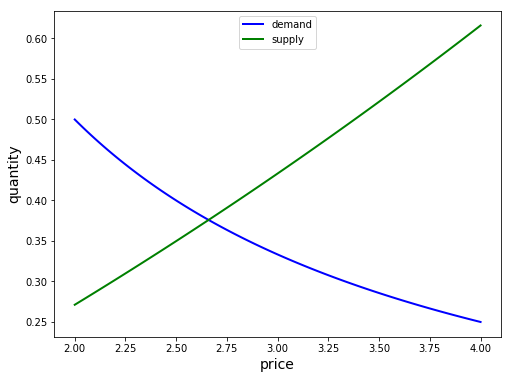

In [13]:
eq.plot_equilibrium()

In [14]:
eq.α = 0.12

In [15]:
eq.compute_equilibrium()

Equilibrium price is  2.66
Equilibrium quantity is  0.38


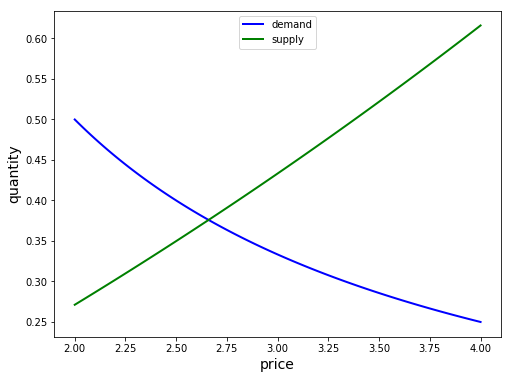

In [16]:
eq.plot_equilibrium()